In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

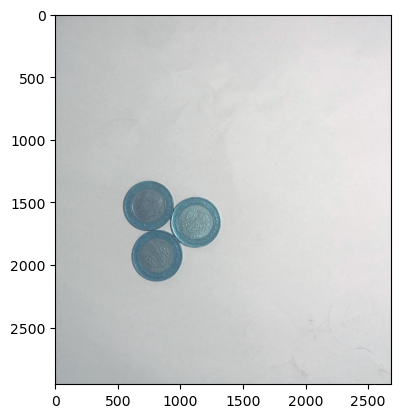

In [3]:
# Örnek 4.12: Watershed Algoritması – 1

imgOrj = cv2.imread('../DATA/26_coins.jpg')
plt.imshow(imgOrj)

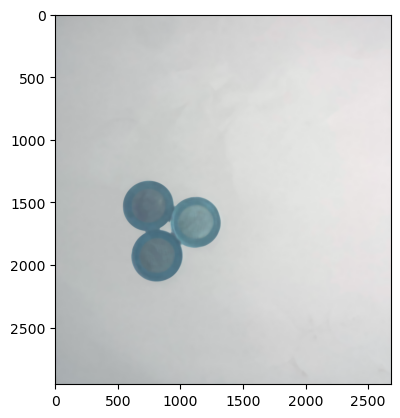

In [4]:
imgBLR = cv2.medianBlur(imgOrj,31)
plt.imshow(imgBLR)

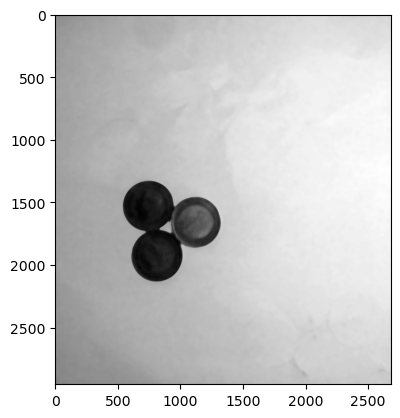

In [6]:
imgGray = cv2.cvtColor(imgBLR,cv2.COLOR_BGR2GRAY)
plt.imshow(imgGray, cmap='gray')

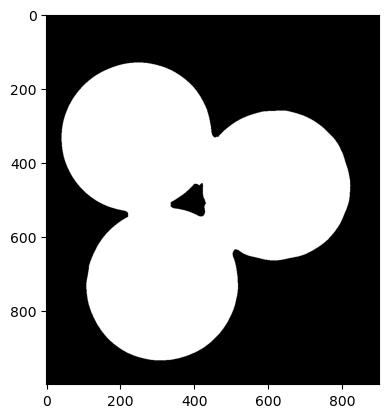

In [14]:
ret, imgTH = cv2.threshold(imgGray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(imgTH[1200:2200, 500:1400], cmap='gray')

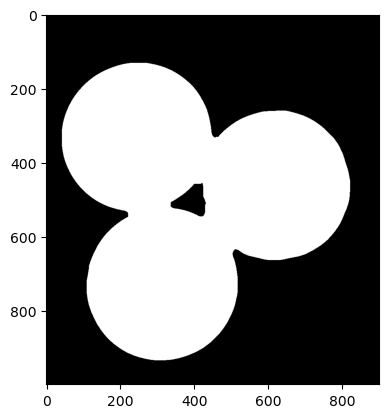

In [17]:
#MORPH open beyaz yerde hicbir siyah nokta kalmamasini sagliyor
kernel = np.ones((5,5),np.uint8)
imgOPN = cv2.morphologyEx(imgTH, cv2.MORPH_OPEN, kernel, iterations=7)

plt.imshow(imgOPN[1200:2200, 500:1400], cmap='gray')

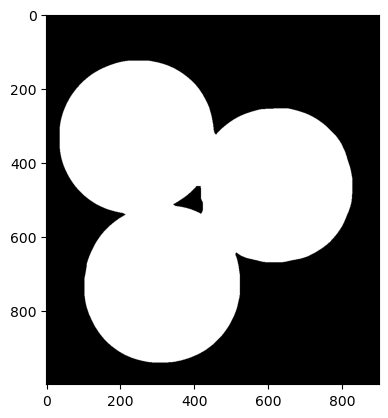

In [18]:
#Background Area. Beyaz alani genisletiyoruz
sureBG = cv2.dilate(imgOPN,kernel,iterations=3)

plt.imshow(sureBG[1200:2200, 500:1400], cmap='gray')

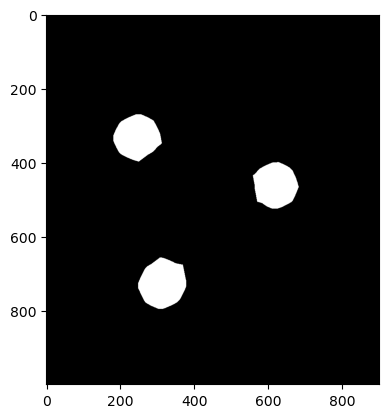

In [19]:
#Foreground Area
dist_transform = cv2.distanceTransform(imgOPN,cv2.DIST_L2,5)
ret, sureFG = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

plt.imshow(sureFG[1200:2200, 500:1400], cmap='gray')

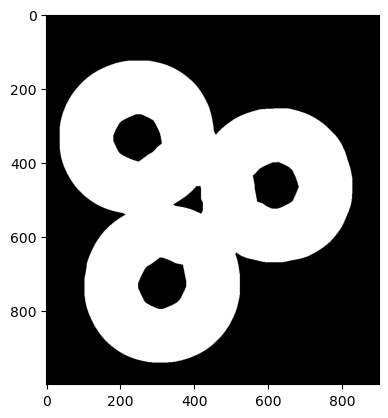

In [21]:
#Unknown Area
sureFG = np.uint8(sureFG)
unKnownArea = cv2.subtract(sureBG,sureFG)

plt.imshow(unKnownArea[1200:2200, 500:1400], cmap='gray')

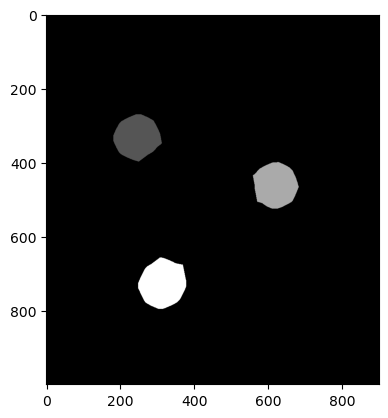

In [23]:
ret, markers = cv2.connectedComponents(sureFG,labels=5)

plt.imshow(markers[1200:2200, 500:1400], cmap='gray')

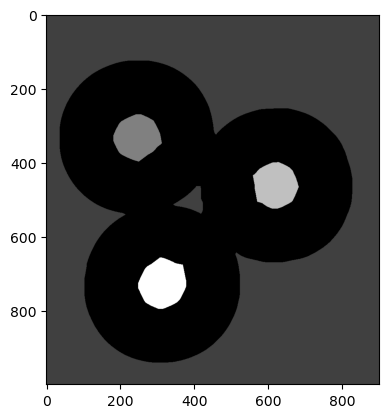

In [24]:
markers = markers +1
markers[unKnownArea==255] = 0

plt.imshow(markers[1200:2200, 500:1400], cmap='gray')

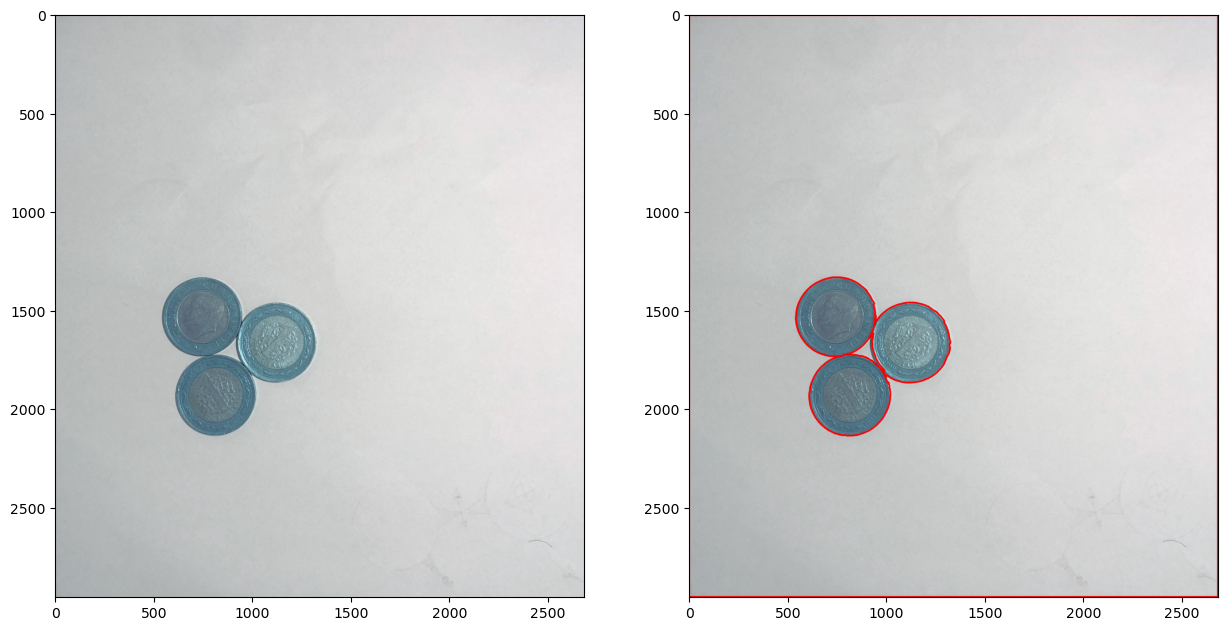

In [25]:
#applying watershed
markers = cv2.watershed(imgOrj,markers)

contours, hierarchy = cv2.findContours(markers,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

imgCopy = imgOrj.copy()
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        #bağlantılarda ilk kısmın i.satırının 3.sütunu -1 e eşitse dış çerçeve demektir.
        cv2.drawContours(imgCopy,contours,i,(255,0,0),5)

f, eksen = plt.subplots(1,2,figsize=(15,15))
eksen[0].imshow(imgOrj)
eksen[1].imshow(imgCopy)

Text(70, 155, 'unKnownArea')

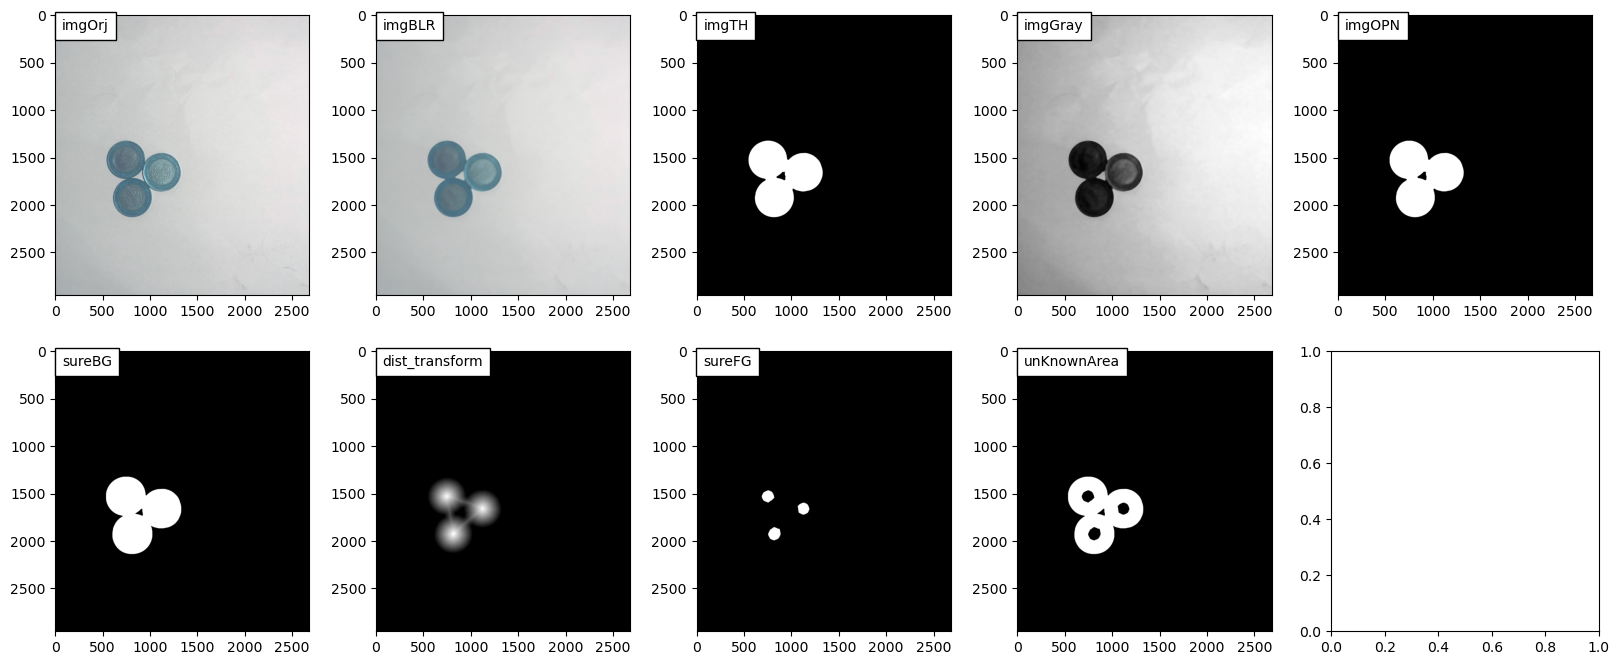

In [26]:
x = 70
y = 155
f, eksen = plt.subplots(2,5,figsize=(20,8))
eksen[0,0].imshow(imgOrj,cmap='gray')
eksen[0,0].text(x, y, 'imgOrj', bbox={'facecolor': 'white', 'pad': 5})

eksen[0,1].imshow(imgBLR,cmap='gray')
eksen[0,1].text(x, y, 'imgBLR', bbox={'facecolor': 'white', 'pad': 5})

eksen[0,2].imshow(imgTH,cmap='gray')
eksen[0,2].text(x, y, 'imgTH', bbox={'facecolor': 'white', 'pad': 5})

eksen[0,3].imshow(imgGray,cmap='gray')
eksen[0,3].text(x, y, 'imgGray', bbox={'facecolor': 'white', 'pad': 5})

eksen[0,4].imshow(imgOPN,cmap='gray')
eksen[0,4].text(x, y, 'imgOPN', bbox={'facecolor': 'white', 'pad': 5})

eksen[1,0].imshow(sureBG,cmap='gray')
eksen[1,0].text(x, y, 'sureBG', bbox={'facecolor': 'white', 'pad': 5})

eksen[1,1].imshow(dist_transform,cmap='gray')
eksen[1,1].text(x, y, 'dist_transform', bbox={'facecolor': 'white', 'pad': 5})

eksen[1,2].imshow(sureFG,cmap='gray')
eksen[1,2].text(x, y, 'sureFG', bbox={'facecolor': 'white', 'pad': 5})

eksen[1,3].imshow(unKnownArea,cmap='gray')
eksen[1,3].text(x, y, 'unKnownArea', bbox={'facecolor': 'white', 'pad': 5})

#eksen[1,4].imshow(imageCNR,cmap='gray')
#eksen[1,4].text(x, y, 'imageCNR', bbox={'facecolor': 'white', 'pad': 5})